In [6]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# 1. Setează căile directoarelor
train_dir = "C:\\Users\\anton\\Desktop\\TEMA 2 TIA\\Train"
val_dir = "C:\\Users\\anton\\Desktop\\TEMA 2 TIA\\Validation"
test_dir = "C:\\Users\\anton\\Desktop\\TEMA 2 TIA\\Test"
categories = os.listdir(train_dir)  # Se presupune că fiecare subfolder din train este o categorie

In [8]:
# 2. Funcție pentru încărcarea imaginilor și extragerea caracteristicilor
def load_images_and_features(directory, categories, image_size=(128, 128)):
    images = []
    labels = []
    image_paths = []
    for category in categories:
        category_path = os.path.join(directory, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                # Redimensionare imagine
                img_resized = cv2.resize(img, image_size)
                # Aplatizare imagine pentru a obține vectori de caracteristici
                features = img_resized.flatten()
                images.append(features)
                labels.append(category)
                image_paths.append(img_path)
    return np.array(images), labels, image_paths

In [9]:
# 3. Încarcă datele
X_train, y_train, train_paths = load_images_and_features(train_dir, categories)
X_val, y_val, val_paths = load_images_and_features(val_dir, categories)
X_test, y_test, test_paths = load_images_and_features(test_dir, categories)

In [10]:
# 4. Transformă etichetele în format numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [11]:
# 5. Inițializează și antrenează modelul KNN
k = 5  # Numărul de vecini
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train_encoded)

KNeighborsClassifier()

In [12]:
# 6. Prezice etichetele pentru seturile de antrenare, validare și testare
y_train_pred = knn.predict(X_train)
y_val_pred = knn.predict(X_val)
y_test_pred = knn.predict(X_test)

In [13]:
# 7. Calculează și afișează matricea de confuzie și indicatorii de performanță
def evaluate_performance(y_true, y_pred, title):
    print(f"\nPerformanță pe setul {title}:")
    print(classification_report(y_true, y_pred, target_names=categories))
    cm = confusion_matrix(y_true, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 10  # Normalizare la intervalul 0-10
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt='.1f', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.title(f"Matricea de confuzie normalizată ({title})")
    plt.xlabel("Etichete prezise")
    plt.ylabel("Etichete reale")
    plt.show()


Performanță pe setul de antrenare:
              precision    recall  f1-score   support

        bear       0.41      0.77      0.53        60
   butterfly       0.45      0.50      0.47        60
         cat       0.69      0.63      0.66        60
         cow       0.69      0.45      0.55        60
        deer       0.19      0.78      0.31        60
         dog       0.50      0.42      0.45        60
     dolphin       0.50      0.85      0.63        60
    elephant       0.72      0.43      0.54        60
    flamingo       0.33      0.60      0.43        60
         fox       0.50      0.33      0.40        60
       horse       0.46      0.18      0.26        60
        lion       0.50      0.67      0.57        60
       panda       1.00      0.45      0.62        60
      parrot       0.58      0.25      0.35        60
     penguin       0.68      0.38      0.49        60
         pig       0.53      0.30      0.38        60
       sheep       0.59      0.43      0.50  

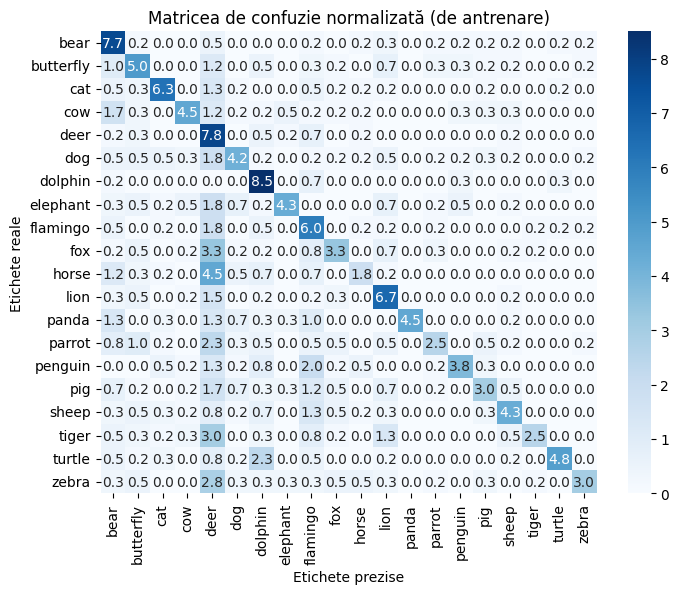


Performanță pe setul de validare:
              precision    recall  f1-score   support

        bear       0.37      0.76      0.49        25
   butterfly       0.40      0.48      0.44        25
         cat       0.61      0.56      0.58        25
         cow       0.83      0.40      0.54        25
        deer       0.21      0.80      0.33        25
         dog       0.48      0.48      0.48        25
     dolphin       0.59      0.88      0.71        25
    elephant       0.65      0.52      0.58        25
    flamingo       0.33      0.60      0.42        25
         fox       0.50      0.28      0.36        25
       horse       0.33      0.08      0.13        25
        lion       0.56      0.92      0.70        25
       panda       1.00      0.36      0.53        25
      parrot       0.67      0.32      0.43        25
     penguin       0.64      0.36      0.46        25
         pig       0.53      0.32      0.40        25
       sheep       0.61      0.44      0.51   

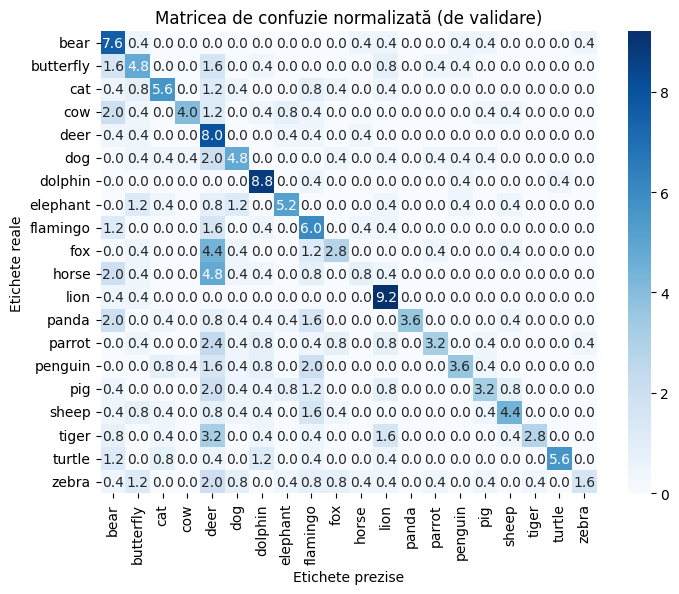


Performanță pe setul de testare:
              precision    recall  f1-score   support

        bear       0.42      0.73      0.54        15
   butterfly       0.33      0.40      0.36        15
         cat       0.62      0.53      0.57        15
         cow       0.67      0.40      0.50        15
        deer       0.18      0.80      0.29        15
         dog       0.56      0.60      0.58        15
     dolphin       0.46      0.87      0.60        15
    elephant       0.80      0.27      0.40        15
    flamingo       0.34      0.67      0.45        15
         fox       0.38      0.33      0.36        15
       horse       0.33      0.07      0.11        15
        lion       0.48      0.73      0.58        15
       panda       1.00      0.33      0.50        15
      parrot       0.71      0.33      0.45        15
     penguin       0.56      0.33      0.42        15
         pig       0.40      0.13      0.20        15
       sheep       0.33      0.20      0.25    

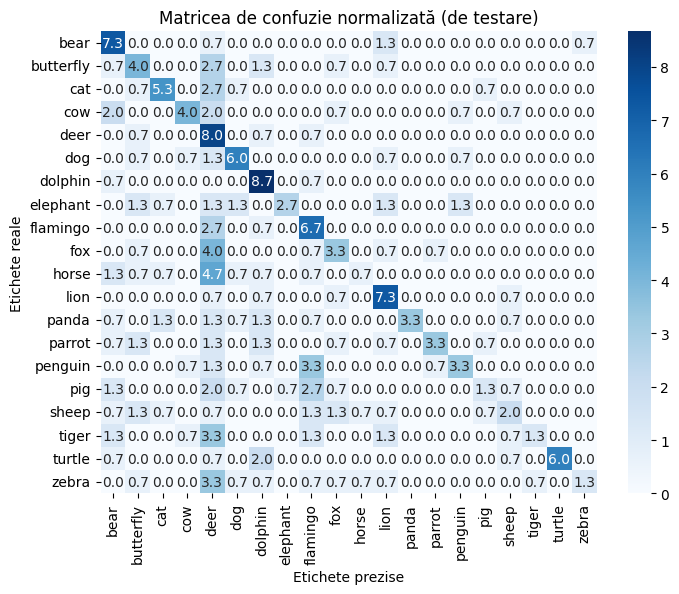

In [14]:
# Evaluează performanța pe fiecare set
evaluate_performance(y_train_encoded, y_train_pred, "de antrenare")
evaluate_performance(y_val_encoded, y_val_pred, "de validare")
evaluate_performance(y_test_encoded, y_test_pred, "de testare")

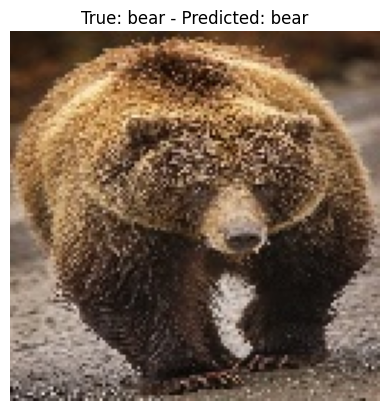

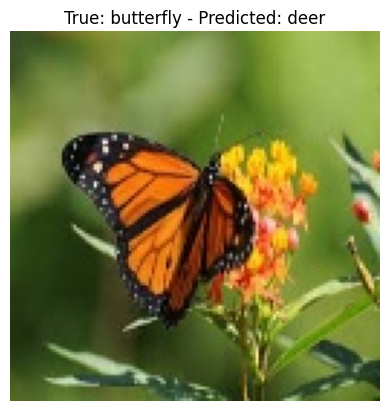

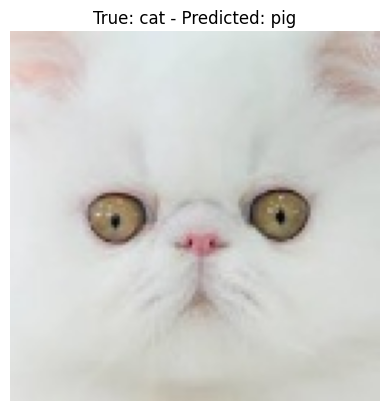

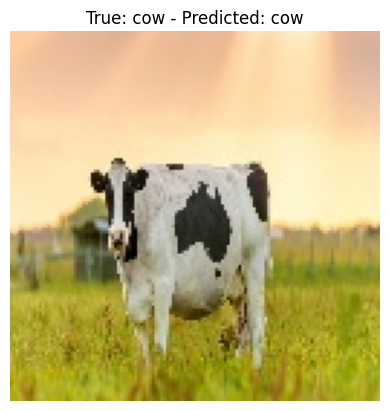

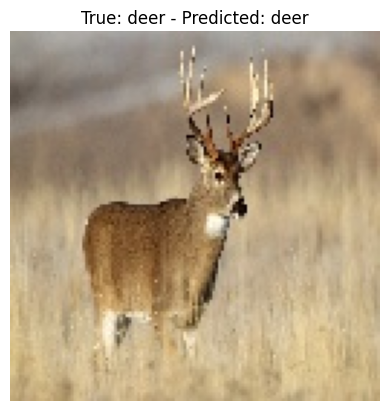

In [15]:
# 8. Afișează imagini din setul de testare cu etichetele adevărate și prezise
def display_test_images_with_predictions(X_test, y_test, y_test_pred, test_paths, categories, num_images=5):
    displayed_categories = set()  # Urmărește categoriile deja afișate
    for i in range(len(test_paths)):
        if len(displayed_categories) >= num_images:
            break  # Oprește afișearea dacă s-au afișat suficiente categorii

        img_path = test_paths[i]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Conversie la RGB pentru a vizualiza corect

        true_label = y_test[i]
        predicted_label = label_encoder.inverse_transform([y_test_pred[i]])[0]

        # Afișează doar imagini din categorii diferite
        if true_label in displayed_categories:
            continue

        # Afișează imaginea și etichetele
        plt.imshow(img)
        plt.title(f"True: {label_encoder.inverse_transform([true_label])[0]} - Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        # Adaugă categoria afișată
        displayed_categories.add(true_label)

# Afișează imagini și predicții pentru un număr de imagini din setul de testare
display_test_images_with_predictions(X_test, y_test_encoded, y_test_pred, test_paths, categories)